[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


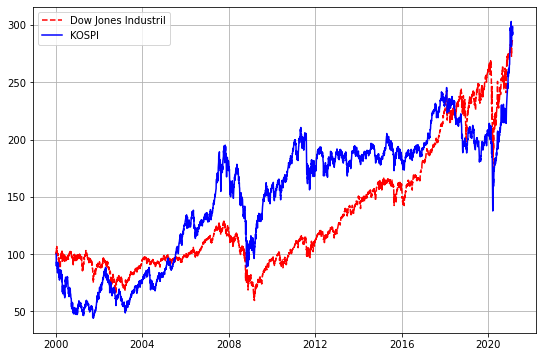

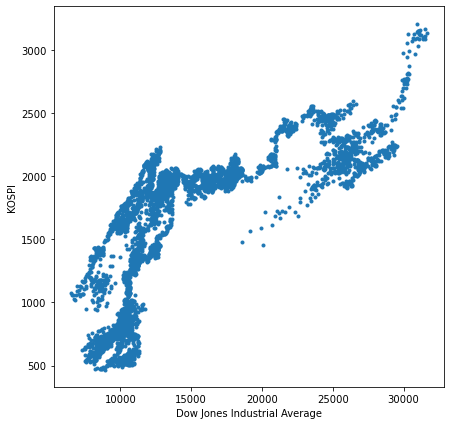

In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt

# Read Dow Jones and KOSPI index from Yahoo
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

# relative index value compared with starting date
d = (dow.Close/dow.Close.loc['2000-01-04'])*100
k = (kospi.Close/kospi.Close.loc['2000-01-04'])*100

plt.figure(figsize=(9,6))
plt.plot(dow.index,d,'r--',label='Dow Jones Industril')
plt.plot(kospi.index,k,'b',label='KOSPI')
plt.legend(loc='best')
plt.grid(True)
plt.show()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


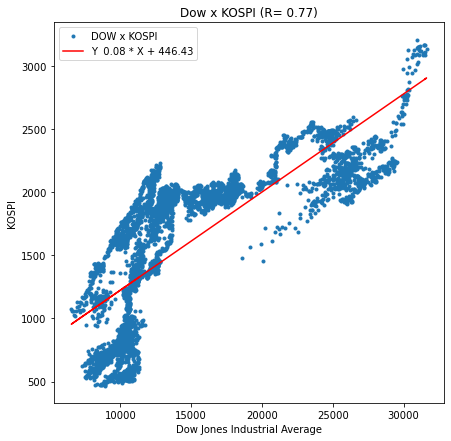

In [3]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from scipy import stats

# Read Dow Jones and KOSPI index from Yahoo
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

df = pd.DataFrame({'X':dow['Close'],'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X,df.Y)
regr_line = f'Y  {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y,'.')
plt.plot(df.X,regr.slope *df.X+regr.intercept,'r')
plt.legend(['DOW x KOSPI',regr_line])
plt.title(f'Dow x KOSPI (R= {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()